# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 4.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'Shape of df_hh_income: {df_hh_income.shape}')
print(f'Shape of df_pct_poverty: {df_pct_poverty.shape}')
print(f'Shape of df_pct_completed_hs: {df_pct_completed_hs.shape}')
print(f'Shape of df_share_race_city: {df_share_race_city.shape}')
print(f'Shape of df_fatalities: {df_fatalities.shape}')

Shape of df_hh_income: (29322, 3)
Shape of df_pct_poverty: (29329, 3)
Shape of df_pct_completed_hs: (29329, 3)
Shape of df_share_race_city: (29268, 7)
Shape of df_fatalities: (2535, 14)


In [ ]:
print(f'df_hh_income columns: {df_hh_income.columns}')
print(f'df_pct_poverty columns: {df_pct_poverty.columns}')
print(f'df_pct_completed_hs columns: {df_pct_completed_hs.columns}')
print(f'df_share_race_city columns: {df_share_race_city.columns}')
print(f'df_fatalities columns: {df_fatalities.isnull().columns}')

df_hh_income columns: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty columns: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs columns: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city columns: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities columns: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
print(f'df_hh_income number of NaN: {df_hh_income.isnull().sum().sum()}')
print(f'df_pct_poverty number of NaN: {df_pct_poverty.isnull().sum().sum()}')
print(f'df_pct_completed_hs number of NaN: {df_pct_completed_hs.isnull().sum().sum()}')
print(f'df_share_race_city number of NaN: {df_share_race_city.isnull().sum().sum()}')
print(f'df_fatalities number of NaN: {df_fatalities.isnull().sum().sum()}')

df_hh_income number of NaN: 51
df_pct_poverty number of NaN: 0
df_pct_completed_hs number of NaN: 0
df_share_race_city number of NaN: 0
df_fatalities number of NaN: 346


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
for column in df_fatalities.columns.tolist():
  print(f'{column} has NaN: {df_fatalities[column].isnull().sum()}')

id has NaN: 0
name has NaN: 0
date has NaN: 0
manner_of_death has NaN: 0
armed has NaN: 9
age has NaN: 77
gender has NaN: 0
race has NaN: 195
city has NaN: 0
state has NaN: 0
signs_of_mental_illness has NaN: 0
threat_level has NaN: 0
flee has NaN: 65
body_camera has NaN: 0


In [ ]:
for column in df_hh_income.columns.tolist():
  print(f'{column} has NaN: {df_hh_income[column].isnull().sum()}')

Geographic Area has NaN: 0
City has NaN: 0
Median Income has NaN: 51


In [ ]:
df_hh_income.dropna(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
index_to_drop = df_pct_poverty[ (df_pct_poverty['poverty_rate'] == '-') ].index
df_pct_poverty.drop(index_to_drop , inplace=True)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
state_poverty.sort_values(ascending=False, inplace=True)

In [ ]:
fig = px.bar(state_poverty, title='Poverty Rate in each US State', labels={'value': 'Mean Poverty %', 'Geographic Area': 'State'})
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
index_to_drop = df_pct_completed_hs[ (df_pct_completed_hs['percent_completed_hs'] == '-') ].index
df_pct_completed_hs.drop(index_to_drop , inplace=True)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
state_hs_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
state_hs_graduation.sort_values(ascending=False, inplace=True)

In [ ]:
fig = px.bar(state_hs_graduation, title='HS Graduation Rate in each US State', labels={'value': 'Mean % HS Graduated', 'Geographic Area': 'State'})
fig.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
df_hs_grad_poverty = pd.concat([state_poverty, state_hs_graduation], axis=1)
fig = px.line(df_hs_grad_poverty)
fig.show()

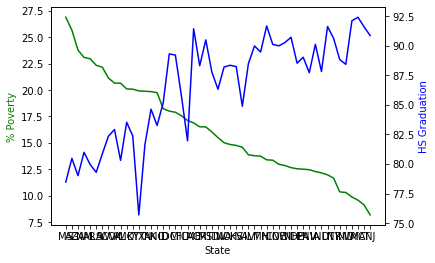

<Figure size 10080x576 with 0 Axes>

In [ ]:
state_poverty.sort_index(inplace=True)
state_hs_graduation.sort_index(inplace=True)

ax1 = plt.gca()
ax2 = ax1.twinx()

plt.figure(figsize=(140,8))

ax1.plot(df_hs_grad_poverty.index, df_hs_grad_poverty['poverty_rate'], color='g')
ax2.plot(df_hs_grad_poverty.index, df_hs_grad_poverty['percent_completed_hs'], 'b')

ax1.set_xlabel('State')
ax1.set_ylabel('% Poverty', color='green')
ax2.set_ylabel('HS Graduation', color='blue')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

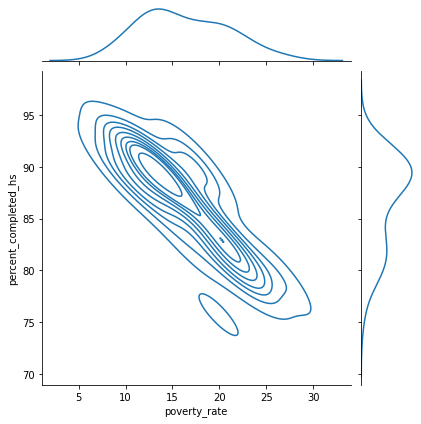

In [ ]:
sns.jointplot(data=df_hs_grad_poverty, x="poverty_rate", y="percent_completed_hs",kind="kde")

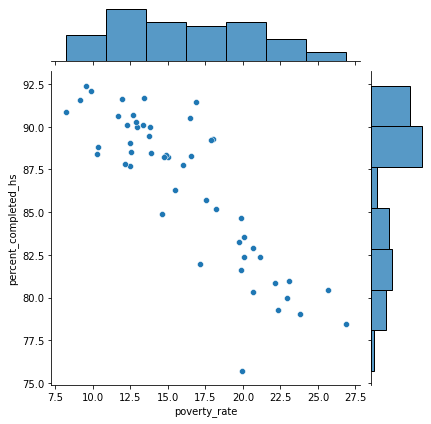

In [ ]:
sns.jointplot(data=df_hs_grad_poverty, x="poverty_rate", y="percent_completed_hs")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

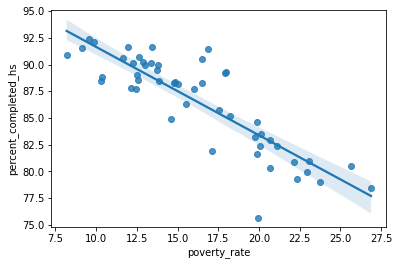

In [ ]:
sns.regplot(data=df_hs_grad_poverty,
            x='poverty_rate',
            y='percent_completed_hs')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
cols = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
for col in cols:
  print(f'(X) in {col}: {df_share_race_city[col].value_counts()["(X)"]}')

(X) in share_white: 20
(X) in share_black: 20
(X) in share_native_american: 20
(X) in share_asian: 20
(X) in share_hispanic: 20


In [ ]:
cols = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
for col in cols:
  index_to_drop3 = df_share_race_city[ (df_share_race_city[col] == '(X)') ].index
  df_share_race_city.drop(index_to_drop3 , inplace=True)
  df_share_race_city[col] = df_share_race_city[col].astype(float)

In [ ]:
df_state_race = df_share_race_city.groupby('Geographic area')[cols].mean()

In [ ]:
fig = px.bar(df_state_race, title='Racial Makeup of Each US State', labels={'value':'Population', 'Geographic area': 'State'})
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
deaths_by_race = df_fatalities.groupby('race')['race'].count()

In [ ]:
fig = px.pie(deaths_by_race, values=deaths_by_race.values, names=deaths_by_race.index, hole=.3, title='Police killings by race')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
df = df_fatalities['gender'].value_counts()
fig = px.histogram(df, x=df.index, y=df.values, color=df.index,
             height=400)
fig.update_layout(yaxis_title="Total Deaths")
fig.show()

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
fig = px.histogram(df_fatalities, x="manner_of_death",
             color='gender', barmode='group',
             height=400)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
fig = px.box(df_fatalities, x="manner_of_death", y='age', color="gender")

fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
armed = df_fatalities.groupby('armed')['armed'].count()
fig = px.bar(armed, title='Armed vs Unarmed Victims')
fig.show()

In [ ]:
print(f'percentage of police killings were people armed: {(1-(armed["unarmed"]/len(df_fatalities)))*100}')

percentage of police killings were people armed: 93.25443786982248


In [ ]:
print(f'people killed by police were armed with guns({armed["gun"]}) versus unarmed({armed["unarmed"]}).')

people killed by police were armed with guns(1398) versus unarmed(171)


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
print(f'Percentage of people killed were under 25 years old: {len(df_fatalities[df_fatalities["age"] < 26])/len(df_fatalities)*100}')

Percentage of people killed were under 25 years old: 21.814595660749507


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

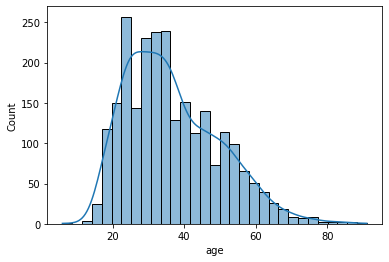

In [ ]:
sns.histplot(data=df_fatalities, x="age", kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

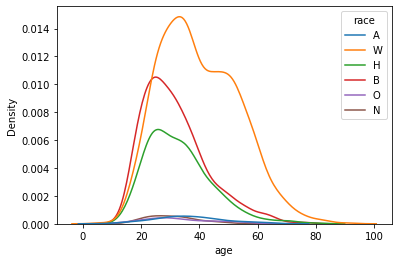

In [ ]:
sns.kdeplot(data=df_fatalities, x="age", hue='race')

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
races = df_fatalities.groupby('race')['race'].count()
fig = px.bar(races, title='Deaths by race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
print(f'percentage of people killed by police have been diagnosed with a mental illness: \
{df_fatalities["signs_of_mental_illness"].value_counts()[1]/len(df_fatalities)*100}')

percentage of people killed by police have been diagnosed with a mental illness: 24.970414201183434


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
dangerous_cities = df_fatalities.groupby('city')['city'].count().sort_values(ascending=False)[:10]

In [ ]:
fig = px.bar(dangerous_cities, title="Most Dangerous Cities", height=400, labels={'value':'Deaths'})
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
dangerous_cities_w_states = df_fatalities.groupby(['city']).agg({'id':'count', 'state': 'first'}).sort_values(by='id', ascending=False)[:10]

In [ ]:
dangerous_cities_w_states.loc[dangerous_cities_w_states.index == "Las Vegas", "state"].iloc[0]

'NV'

In [ ]:
list_of_indexes = []
for city in dangerous_cities_w_states.index:
  city_to_find = f'{city} city'
  state = dangerous_cities_w_states.loc[dangerous_cities_w_states.index == city, "state"].iloc[0]
  list_of_indexes.append(df_share_race_city[(df_share_race_city['City'] == city_to_find) &
                                            (df_share_race_city['Geographic area'] == state)].index[0])
top_10_cities_races = df_share_race_city.iloc[list_of_indexes]


In [ ]:
cols = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
for col in cols:
  top_10_cities_races[col] = top_10_cities_races[col].astype(float)

In [ ]:
top_10_cities_races['total'] = top_10_cities_races.sum(axis=1)

In [ ]:
for col in cols:
  top_10_cities_races[col] = top_10_cities_races[col]/top_10_cities_races['total']
top_10_cities_races

<ipython-input-145-e130ab1b8c72>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,total
2714,CA,Los Angeles city,0.42,0.08,0.01,0.09,0.40,119.90
1201,AZ,Phoenix city,0.56,0.05,0.02,0.03,0.34,118.60
25157,TX,Houston city,0.40,0.19,0.01,0.05,0.35,124.70
6278,IL,Chicago city,0.40,0.29,0.00,0.05,0.26,112.80
15666,NV,Las Vegas city,0.56,0.10,0.01,0.05,0.28,111.50
25872,TX,San Antonio city,0.50,0.05,0.01,0.02,0.43,146.00
19379,OH,Columbus city,0.62,0.28,0.00,0.04,0.06,99.50
4633,FL,Miami city,0.45,0.12,0.00,0.01,0.43,163.10
24543,TX,Austin city,0.58,0.07,0.01,0.05,0.30,118.70
14472,MO,St. Louis city,0.44,0.49,0.00,0.03,0.04,99.80


In [ ]:
top_10_cities_races.drop(['Geographic area', 'total'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
top_10_cities_races.set_index('City', inplace=True)

In [ ]:
fig = px.bar(top_10_cities_races, title='Racial Makeup of Most Dangerous Cities', labels={'value':'% Population', 'Geographic area': 'City'})
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
police_killings_by_state = df_fatalities.groupby('state')['state'].count()
police_killings_by_state

In [ ]:
fig = px.choropleth(police_killings_by_state, locationmode="USA-states", locations=police_killings_by_state.index,
                    color=police_killings_by_state.values, scope="usa", title="Police killings by state")

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format="%d/%m/%y")

In [ ]:
df_fatalities.sort_values('date', inplace=True)

In [ ]:
police_killing_by_date = df_fatalities.groupby('date')['date'].count()

In [ ]:
fig = px.line(police_killing_by_date, x=police_killing_by_date.index, y=police_killing_by_date.values, labels={'y':'Deaths'})
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).